In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit.extensions import Initialize

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer, execute
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor

from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
Remote_QProcessor = least_busy(provider.backends(filters=lambda qprocessor: qprocessor.configuration().n_qubits >= 3 
                                       and not qprocessor.configuration().simulator 
                                       and qprocessor.status().operational==True))
print("El computador cuántico menos ocupado es el " + Remote_QProcessor.name())

ibmqfactory.load_account:WARNING:2022-10-04 14:41:55,447: Credentials are already in use. The existing account in the session will be replaced.


El computador cuántico menos ocupado es el ibm_perth


In [18]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
#Initial State Preparation
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.s(qreg_q[0])
#Oracle
circuit.cz(qreg_q[0], qreg_q[1])
circuit.s(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[1])
#Difuser
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q,creg_c )

job = execute ( circuit , backend = Remote_QProcessor , shots = 1 )
job_monitor(job)

Job Status: job has successfully run


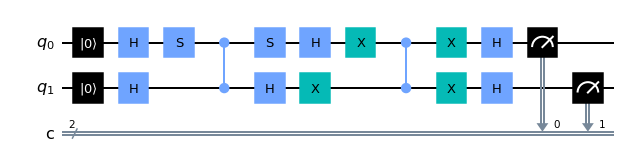

In [19]:
circuit.draw()

In [20]:
from qiskit.result import utils
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize

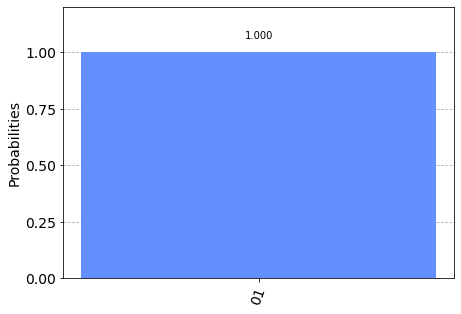

In [21]:
device_result = job.result()

plot_histogram ( device_result.get_counts(circuit) ) 

Job Status: job has successfully run
{'01': 8192}


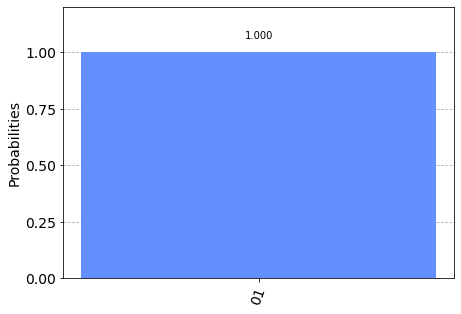

In [22]:
backend = provider.get_backend('ibmq_qasm_simulator')
actividad = execute(circuit, backend, shots=8192)
job_monitor(actividad)

conteo = actividad.result().get_counts()
print(conteo)
plot_histogram(conteo)